# Project: Investigate a Dataset - [TMDb movie]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The TMDb movie data set we will be using for our investigation contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue, downloaded from kaggle https://www.kaggle.com/tmdb/tmdb-movie-metadata.


### Question(s) for Analysis
In this project, we will be investigating and answering question such as the followings
- Which genres are most popular?
- What are the highest grossing movies?
- What are the most popular movies?
- What Genres of movies require higher production budget?
- What Genres of movies generates highest revenue? etc



In [2]:
# import packages to be used
import pandas as pd
import numpy as np
!pip install seaborn --upgrade --quiet
import seaborn as sns
!pip install --upgrade pandas==0.25.0 --quiet
import warnings
warnings.filterwarnings('ignore')
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

<a id='wrangling'></a>
## Data Wrangling

Raw Data has to be prepared and cleaned before it can be analyzed. In this section, we will do the following;
- Load the dataset into a data frame using Pandas
- Explore the number of rows & columns, ranges of values etc.
- Handle missing, incorrect and duplicate data
- Perform any additional steps (creating additional columns etc.)

In [3]:
# Load dataset
movies_raw= pd.read_csv('tmdb-movies.csv')
movies_raw.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#let us check the shape of our datasets
movies_raw.shape

(10866, 21)

In [5]:
#Check data type for the columns
movies_raw.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

Our datasets is made of up 10866 rows and 21 columns.

Let's view the list of columns in the data frame.


In [6]:
movies_raw.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')


#### Description of Columns

    id: Unique id.
    imdb_id: imdb id for each movie on TMDB.
    popularity: Metric used to measure the popularity of the movie.
    budget: Total budget of the moviein USD.
    revenue: Total revenue of the movie in USD.
    original_title: Original title of the movie.
    cast: Names of the cast of the movie separated by "|".
    homepage: The website of the movie.
    director:name(s) of the director(s) of the movie (separated by "|" if there are more than one director).
    tagline: Catchphrase describing the movie.
    keywords: Keywords related to the movie.
    overview: Summary of the plot of the movie.
    runtime: Total runtime of the movie in minutes.
    genres: Genres of the movie separated by "|".
    production_companies:Production company of the movie.
    release_date: Release date of the movie.
    vote_count: Number of voters of te movie.
    vote_average: Average user rating of the movie
    release_year: Release year of the movie.
    budget_adj: Total budget of the moviein USD in terms of 2010 dollars, accounting for inflation over time.
    revenue_adj: Total budget of the movie in USD in terms of 2010 dollars, accounting for inflation over time.



Not all the columns are revelant to the questions we seek to answer. We will proceed select a subset of columns with the relevant data for our analysis.

In [7]:
#Extract revelant columns
needed_cols= ['popularity',  
              'original_title',
              'cast', 
              'director',
              'runtime', 
              'genres',
              'vote_count', 
              'vote_average', 
              'release_year', 
              'budget_adj',
              'revenue_adj' ]

In [8]:
len(needed_cols)

11

It is important we extract a copy of the data from these columns into a new data frame movies_df. This is to enable us to continue to modify the data further without affecting the original data frame.

In [9]:
#Extract a copy of the data from these columns for further analysis
movies_df = movies_raw[needed_cols].copy()

In [10]:
#Check our new dataframe
movies_df.head()

,popularity,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


In [11]:
movies_df.shape

(10866, 11)

In [12]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
popularity        10866 non-null float64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(3), object(4)
memory usage: 933.9+ KB


Out of the 11 columns, 7 were detected as numeric columns having the data type float and int. 4 of the columns were detected as string having the data type object.

All the columns seems to have the appropriate data type, therefore there will be no need for any data type conversion.

It appears that every column contains some empty values since the Non-Null count for every column is lower than the total number of rows (64461)

3 of the columns `cast`, `director` and `genre` contains some empty values since the Non-Null count for them is lower than the total number of rows (10866).

We will need to handle those missing values before proceeding into our analysis.



### Data Cleaning
 

In [13]:
#Check for duplicates
movies_df.duplicated().sum()

1

In [14]:
#handle duplicates
movies_df.drop_duplicates(subset=None, keep='first', inplace=True)

In [15]:
#Check for missing values
movies_df.isna().sum()

popularity         0
original_title     0
cast              76
director          44
runtime            0
genres            23
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

The `cast`, `director`, and `genres` columns have rows with missing values. we will take a sample look at them and decide what to do with them afterwards

In [16]:
#Check missing values in the director column
movies_df[movies_df.director.isna()].sample(5)

,popularity,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
2221,0.281852,Scott Pilgrim vs. the Animation,Michael Cera|Alison Pill|Georgette Perna|Mae W...,NaN,4,TV Movie|Animation|Adventure,19,7.7,2010,0.0,0.0
3910,0.002006,Steve Jobs: One Last Thing,NaN,NaN,60,Documentary,11,6.6,2011,0.0,0.0
5972,0.165605,Top Gear: The Perfect Road Trip,Jeremy Clarkson|Richard Hammond,NaN,84,TV Movie|Action|Adventure|Documentary,35,7.6,2013,0.0,0.0
6033,0.048587,Russell Brand: Messiah Complex,Russell Brand,NaN,99,Comedy,12,6.8,2013,0.0,0.0
2401,0.067753,Opeth: In Live Concert At The Royal Albert Hall,"Mikael Ã…kerfeldt|Martin ""Axe"" Axenrot|Martin ...",NaN,163,Music,10,8.6,2010,0.0,0.0


Most of the rows with missing values in the `director` column have no enteries for the `budget_adj` and `revenue_adj`. We will need to check if that is the same for the rows with missing values for the cast and genres columns.

In [17]:
#Check missing values in the cast column
movies_df[movies_df.cast.isna()].sample(5)

,popularity,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
587,0.062536,The Hunting Ground,NaN,Kirby Dick,103,Documentary,39,7.8,2015,0.000000e+00,0.000000e+00
4889,0.075043,2016: Obama's America,NaN,Dinesh D'Souza|John Sullivan,87,Documentary,11,4.7,2012,2.374361e+06,3.172146e+07
3339,0.067761,Zeitgeist: Addendum,NaN,Peter Joseph,123,Documentary|History|War,44,7.0,2008,0.000000e+00,0.000000e+00
8292,0.521669,Baraka,NaN,Ron Fricke,96,Documentary,89,7.6,1992,6.216097e+06,0.000000e+00
4883,0.078472,Fresh Guacamole,NaN,PES,2,Animation,29,7.9,2012,0.000000e+00,0.000000e+00


In [18]:
#check missing values in the genres column
movies_df[movies_df.genres.isna()].sample(5)

,popularity,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
620,0.129696,All Hallows' Eve 2,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,90,NaN,13,5.0,2015,0.00000,0.0
2370,0.081892,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,Michael Scott,0,NaN,12,5.8,2010,0.00000,0.0
10659,0.344172,The Party at Kitty and Stud's,Sylvester Stallone|Henrietta Holm|Nicholas War...,Morton Lewis,71,NaN,10,3.0,1970,28081.84172,0.0
1712,0.302095,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,Russell Mulcahy,88,NaN,57,7.4,2009,0.00000,0.0
4732,0.235911,The Scapegoat,Andrew Scott|Jodhi May|Eileen Atkins|Matthew R...,Charles Sturridge,100,NaN,12,6.2,2012,0.00000,0.0


By taking a sample look at the missing values, we discovered that Most of the rows with missing values in the `cast`, `director` and `genres` have value of 0 in the `budget_adj` and `revenue_adj`, so they won't be neecessary for our analysis. we wil proceed to drop them.

In [19]:
#Drop rows with Missing values
movies_df.dropna(inplace=True)

In [20]:
#check if the rows with missing values have been droped.
movies_df.isna().sum()

popularity        0
original_title    0
cast              0
director          0
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

Also, Any row with a value less than 1 in the `budget_adj`, `revenue_adj`, and `runtime` columns is not relevant to our analysis, so they will be dropped.

In [21]:
#Drop rows with values less than 1 in the budget_adj, revenue_adj and runtime columns
movies_df.drop(movies_df[movies_df['budget_adj'] < 1].index, inplace = True)
movies_df.drop(movies_df[movies_df['revenue_adj'] < 1].index, inplace = True)
movies_df.drop(movies_df[movies_df['runtime'] < 1].index, inplace = True)

#### Creating additional columns

Additional columns need to be created to help our analysis. they include;

    Profit
    lead_actor
    main_genre
    lead_director



In [22]:
#Creating additional columns
movies_df['profit']=movies_df.revenue_adj-movies_df.budget_adj
movies_df['lead_actor']=movies_df.cast.str.split(pat='|',expand=True)[0]
movies_df['main_genre']=movies_df.genres.str.split(pat='|',expand=True)[0]
movies_df['lead_director']=movies_df.director.str.split(pat='|',expand=True)[0]

We will not be needing the `cast`, `genres`, `director` columns anymore so we will drop them also.

In [23]:
#drop cast, genres and director columns
movies_df.drop(['cast','genres','director'],axis=1,inplace=True)

In [24]:
#let us view our new data ready for analysis
movies_df.head()

,popularity,original_title,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,lead_actor,main_genre,lead_director
0,32.985763,Jurassic World,124,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,Chris Pratt,Action,Colin Trevorrow
1,28.419936,Mad Max: Fury Road,120,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,Tom Hardy,Action,George Miller
2,13.112507,Insurgent,119,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08,Shailene Woodley,Adventure,Robert Schwentke
3,11.173104,Star Wars: The Force Awakens,136,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09,Harrison Ford,Action,J.J. Abrams
4,9.335014,Furious 7,137,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09,Vin Diesel,Action,James Wan


In [25]:
#Shape of our data
movies_df.shape

(3848, 12)

Our cleaned data consist of 3848 rows and 12 columns

<a id='eda'></a>
## Exploratory Data Analysis
Exploratory Data Analysis helps us to get valuable insights into our data and answer questions about our data.

We will do this by;

    Getting the descriptive statistics of the data
    Explore relationship between columns using charts and plots.
    Note down some interesting insights from the exploratory analysis

In [26]:
#Get Descriptive statistics of the data
movies_df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,3848.000000,3848.000000,3848.000000,3848.000000,3848.000000,3.848000e+03,3.848000e+03,3.848000e+03
mean,1.193108,109.222453,528.510135,6.168919,2001.255717,4.430511e+07,1.372670e+08,9.296187e+07
std,1.475774,19.914319,880.414950,0.794677,11.286016,4.481373e+07,2.162185e+08,1.941911e+08
min,0.001117,15.000000,10.000000,2.200000,1960.000000,1.309053e+00,2.370705e+00,-4.139124e+08
25%,0.463291,95.750000,71.000000,5.700000,1995.000000,1.318409e+07,1.843827e+07,-1.503876e+06
50%,0.799015,106.000000,205.000000,6.200000,2004.000000,3.007926e+07,6.182197e+07,2.746787e+07
75%,1.374400,119.000000,581.250000,6.700000,2010.000000,6.076720e+07,1.635528e+08,1.075787e+08
max,32.985763,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09


### Asking and Answering Questions

##### What is the number of observation for the various movie Genres in our data?
The number of observations will provide us with information on the number of our data points(movies) in each category of movie genres

In [27]:
#Define a function to plot categorical values
def plot_cat(var, l=12,b=5):
    plt.figure(figsize = (l, b))
    sns.countplot(movies_df[var], order = movies_df[var].value_counts().index)
    plt.xticks(rotation=75)

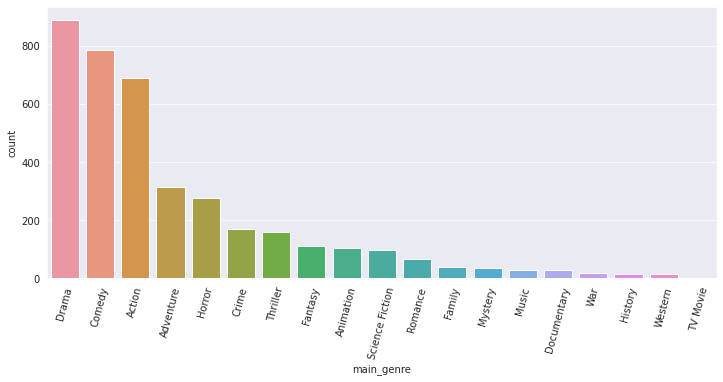

In [28]:
#call function to plot main_genre category
plot_cat('main_genre')

Most of our data points(movies) falls under the `Drama`, `Comedy`, and `Action` genres. `History`, `Western` and `TV Movie` genres have the lowest movies.

##### What year was the largest number of movies released?

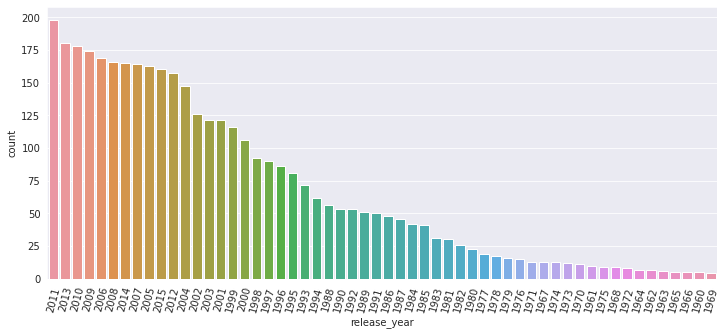

In [29]:
#call function to plot release year of movies
plot_cat('release_year')

The year `2011` saw the largest release of movies more than any other year between `1960` and `2015`. A total of `198` movies were released that year.

#####  What is the Popularity distibution of movies?

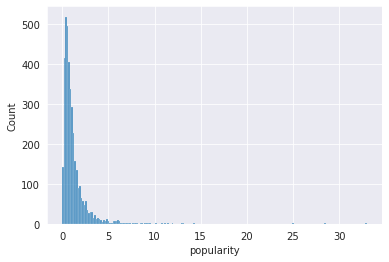

In [30]:
#plot histogram to show distribution of popularity of movies
sns.histplot(movies_df['popularity'], bins = 200);


The popularity distribution of the movies is skewed to the right. a large number of the movies have a popularity within the range of 0 and 1.3

#####  What is the Average Vote distribution of Movies?

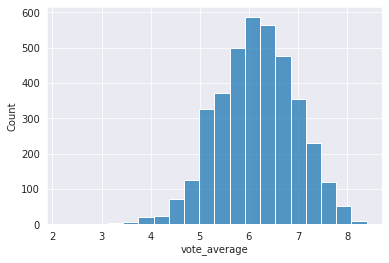

In [31]:
#plot histogram to to show the distribution of the average vote
sns.histplot(movies_df['vote_average'], bins = 20);

The distribution of the vote average appears to be a normal distribution. most of the movies fall between a vote average of 5 and 7

##### Q2. What are the highest grossing movies?

In [32]:
#Get the top 10 grossing movies
top_grossing_movies = movies_df.sort_values(by=['revenue_adj'], ascending=False).head(10)

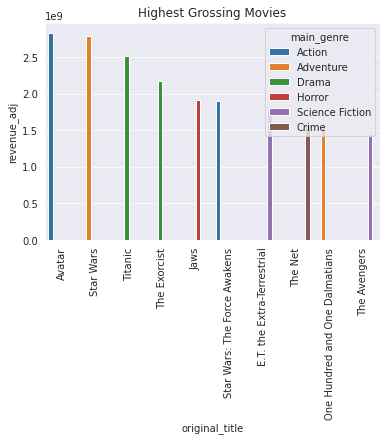

In [33]:
sns.barplot(x="original_title", y="revenue_adj", hue="main_genre", data= top_grossing_movies)
plt.xticks(rotation=90)
plt.title('Highest Grossing Movies');

The top 3 grossing movies are `Avatar`(Action), `Star Wars`(Adventure), and `Titanic`(Drama) within the year (1960-2015) in consideration

##### Q What are the  most popular movies?

In [34]:
#Get most popular movies
top_most_popular_movies = movies_df.sort_values(by=['popularity'], ascending=False).head(10)

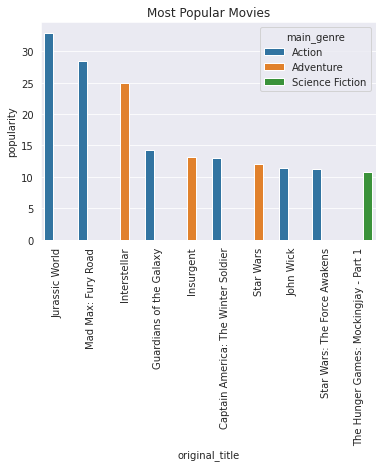

In [35]:
sns.barplot(x="original_title", y="popularity", hue="main_genre", data= top_most_popular_movies)
plt.xticks(rotation=90)
plt.title('Most Popular Movies');

The top 3 most popular movies over the years are `Jurassic World` (`Action`) released in 2015, `Mad Max: Fury Road` (`Action`) released in 2015, and `Intersteller`(`Adventure`) released in 2014.

##### What Genres of movies require higher production budget?

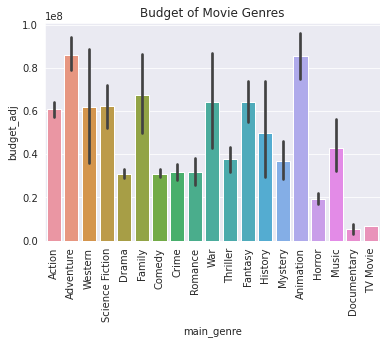

In [36]:
#create barplot to show movie genres and budget
sns.barplot(x="main_genre", y="budget_adj", data= movies_df)
plt.xticks(rotation=90)
plt.title('Budget of Movie Genres');

From the above plot, more money is spent on producing `Adventure`, `Animation` and `Family` Genres movies than other genres of movies.

##### Q What Genres of movies generates highest revenue?

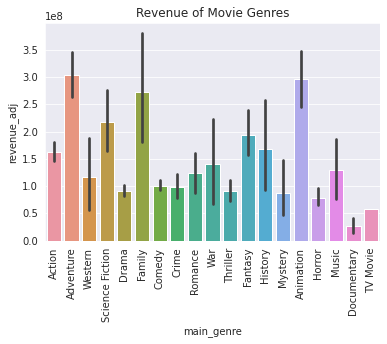

In [37]:
#create barplot of movie genres and revenue
sns.barplot(x="main_genre", y="revenue_adj", data= movies_df)
plt.xticks(rotation=90)
plt.title('Revenue of Movie Genres');

From the above plot, `Adventure`, `Family`, and `Animation` movies yields more revenue than other genres of movies. this could be as a result of the high cost of producing such movies.

##### What Genres of movies are most popular?

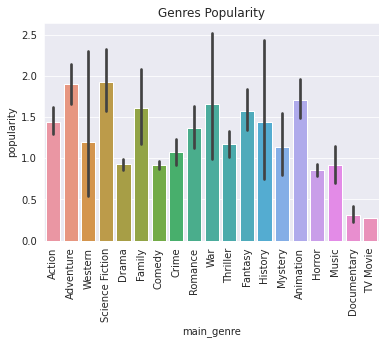

In [38]:
#create a barplot of movie genres and popularity
sns.barplot(x="main_genre", y="popularity", data= movies_df)
plt.xticks(rotation=90)
plt.title('Genres Popularity');

From the above plot, `adventure` and `science fiction` movies have been the most popular

##### Q. Which genres of movies have been most profitable?

In [39]:
#get most profitable movie genres
genres_vs_profit = movies_df.groupby('main_genre')['profit'].mean().sort_values(ascending=False).head(10)

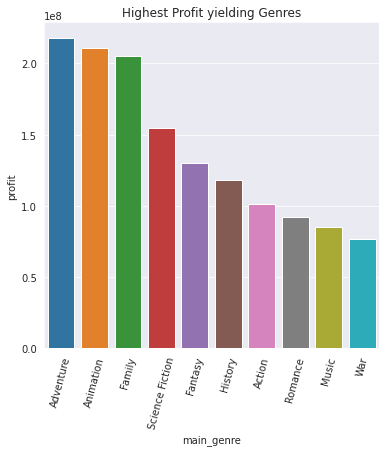

In [40]:
plt.figure(figsize=(6,6))
plt.xticks(rotation=75)
plt.title('Highest Profit yielding Genres')
sns.barplot(x=genres_vs_profit.index, y=genres_vs_profit);

Over the years, `Adventure`, `animation` and `family` genres have made higher profit than the other genres

##### Q.  Which movie genres have the longest runtime?


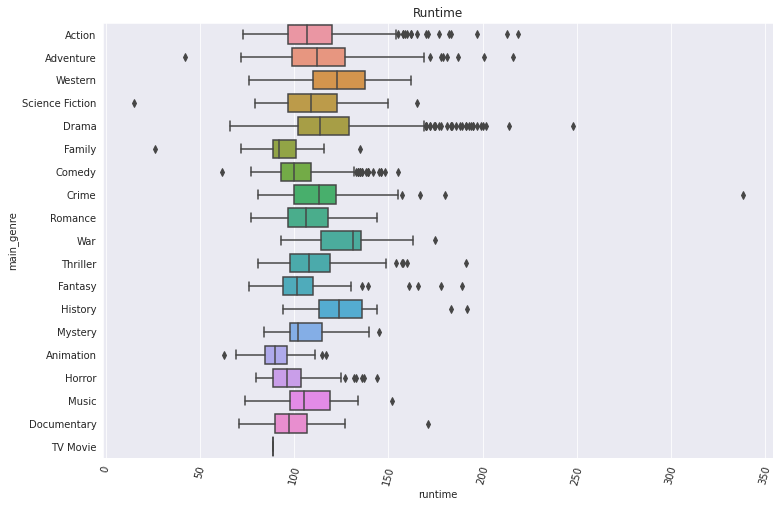

In [41]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=75)
plt.title('Runtime')
sns.boxplot(x='runtime', y= 'main_genre', data=movies_df);

`War` and `history` movies have longer runtime than other genres of movies

##### Q. Will the budget of a movie affect the revenue of the Movie?

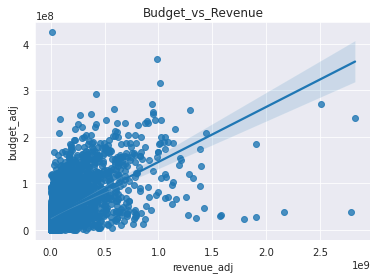

In [42]:
sns.regplot(data=movies_df,
x="revenue_adj",
y="budget_adj")
plt.title('Budget_vs_Revenue');

From the regression plot above, there seems to be a positive correlation between a movie budget and its revenue. This may imply that a movie with a high production budget may yield a high revenue after it has been released. we may need to carry out further analysis to verify this.

##### Q Will the popularity of a movie affect the revenue of the Movie?

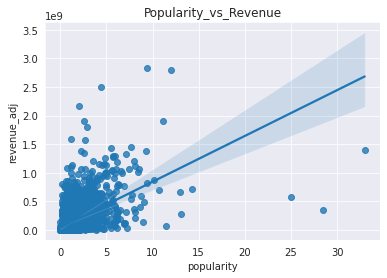

In [43]:
sns.regplot(x='popularity', y='revenue_adj', data=movies_df)
plt.title('Popularity_vs_Revenue');

There seems to be a  positive correlation between the popularity of a movie and its revenue. further analysis could  be carried our to verify this.

<a id='conclusions'></a>
## Conclusions
- Most of our data points(movies) falls under the `Drama`, `Comedy`, and `Action` genres. `History`, `Western` and `TV Movie` genres have the lowest movies.
- The year `2011` saw the largest release of movies more than any other year between `1960` and `2015`. A total of `198` movies were released that year.
- The top 3 grossing movies are Avatar(Action), Star Wars(Adventure), and Titanic(Drama) within the year (1960-2015) in consideration
- The top 3 most popular movies over the years are `Jurassic World` (`Action`) released in 2015, `Mad Max: Fury Road` (`Action`) released in 2015, and `Intersteller`(`Adventure`) released in 2014.
- More money is spent on producing `Adventure`, `Animation` and `Family` Genres movies than other genres of movies.
- `Adventure`, `Family`, and `Animation` movies yields more revenue than other genres of movies. this could be as a result of the high cost of producing such movies.
- `Adventure` and `science fiction` movies have been the most popular.
- `Adventure`, `animation` and `family` genres have made higher profit than the other genres.
- There seems to be a positive correlation between a movie budget and its revenue. This may imply that a movie with a high production budget may yield a high revenue after it has been released. we may need to carry out further analysis to verify this.
- There seems to be a positive correlation between the popularity of a movie and its revenue. further analysis could be carried our to verify this.


#### Limitation

-The dataset had many missing values for the the `budget_adj` and `revenue_adJ`. The raw Data set had over 10,000 rows. after wrangling and cleaning the data, we only had about 3848 rows which is not a good representation of the population.

In [44]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])